In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydot
import seaborn as sea

from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import export_graphviz

%matplotlib inline

In [2]:
fire_data = pd.read_csv('forestfires.csv')

In [3]:
# Demonstrates all columns have identical row count
fire_data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


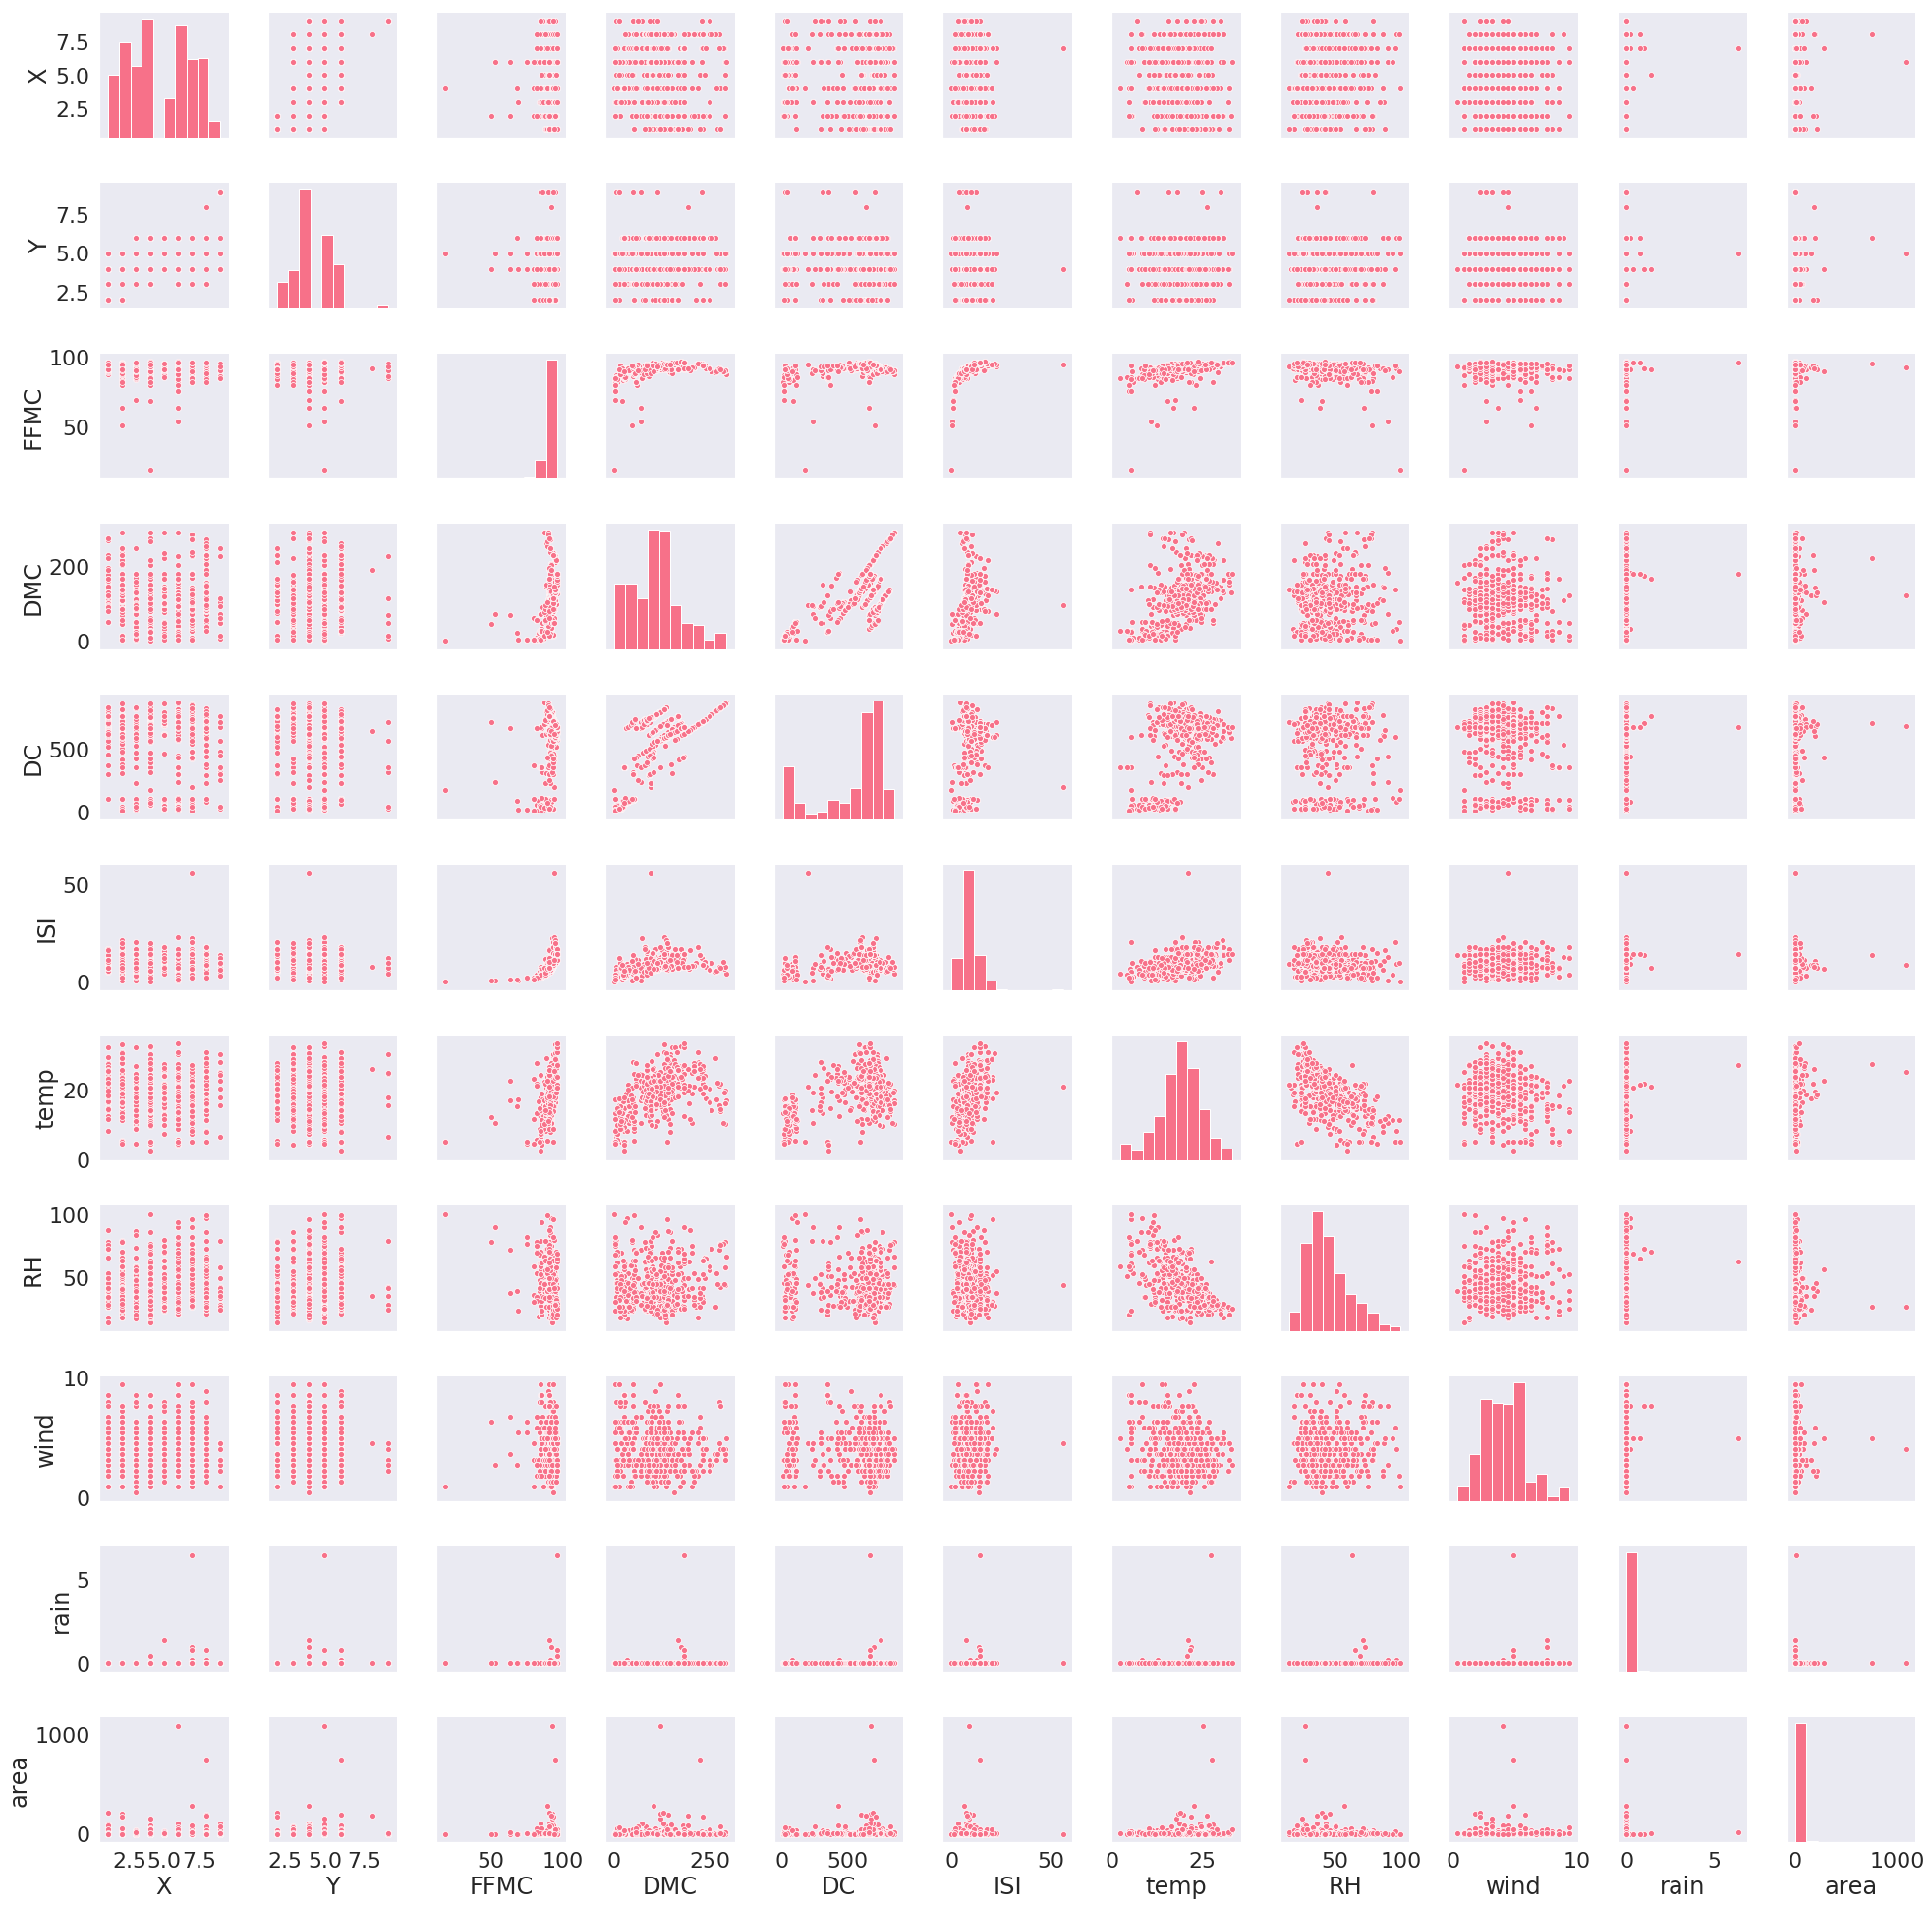

In [4]:
# Generate a pairplot matrix to ascertain whether classes are linearly separable
fire_dataframe = pd.DataFrame(fire_data)
sea.set(context='notebook', style='dark', palette='husl', font='sans-serif', font_scale=2, color_codes=True)
sea.pairplot(fire_dataframe)

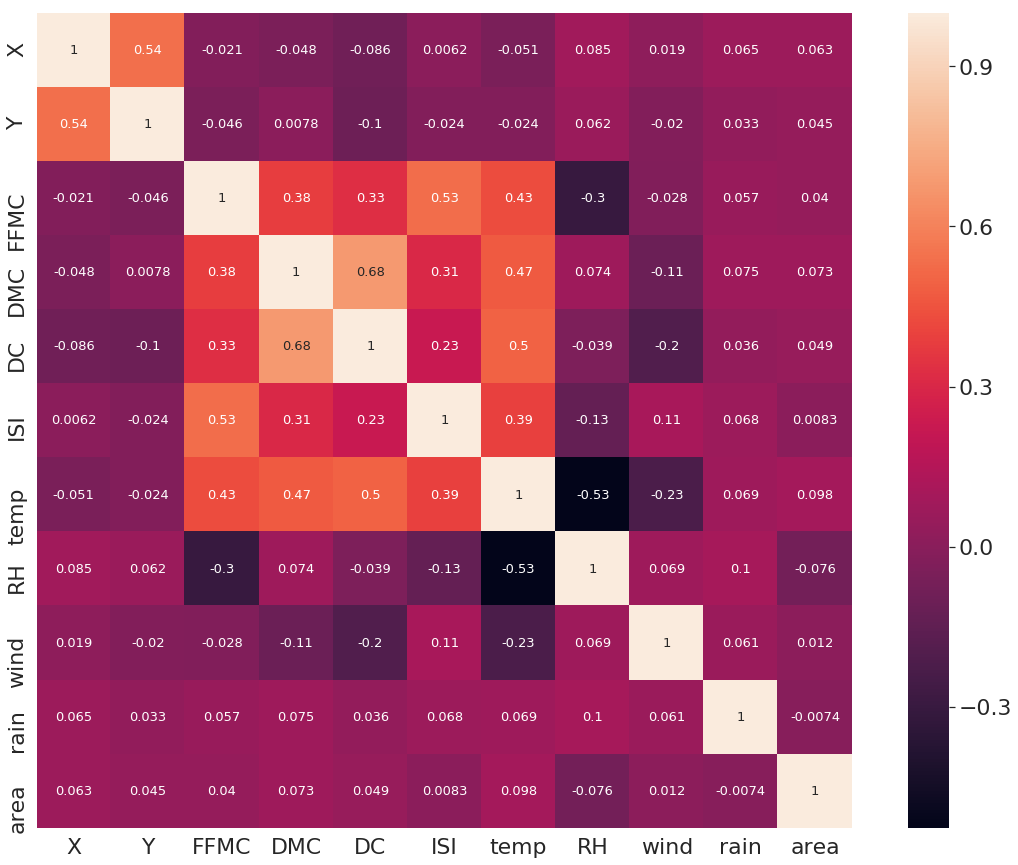

In [5]:
# Correlation visualisation
figure, ax = plt.subplots(figsize=(20, 15))
correlation_matrix = fire_dataframe.corr()
sea.heatmap(correlation_matrix, annot=True, square=True, annot_kws={"size":13})

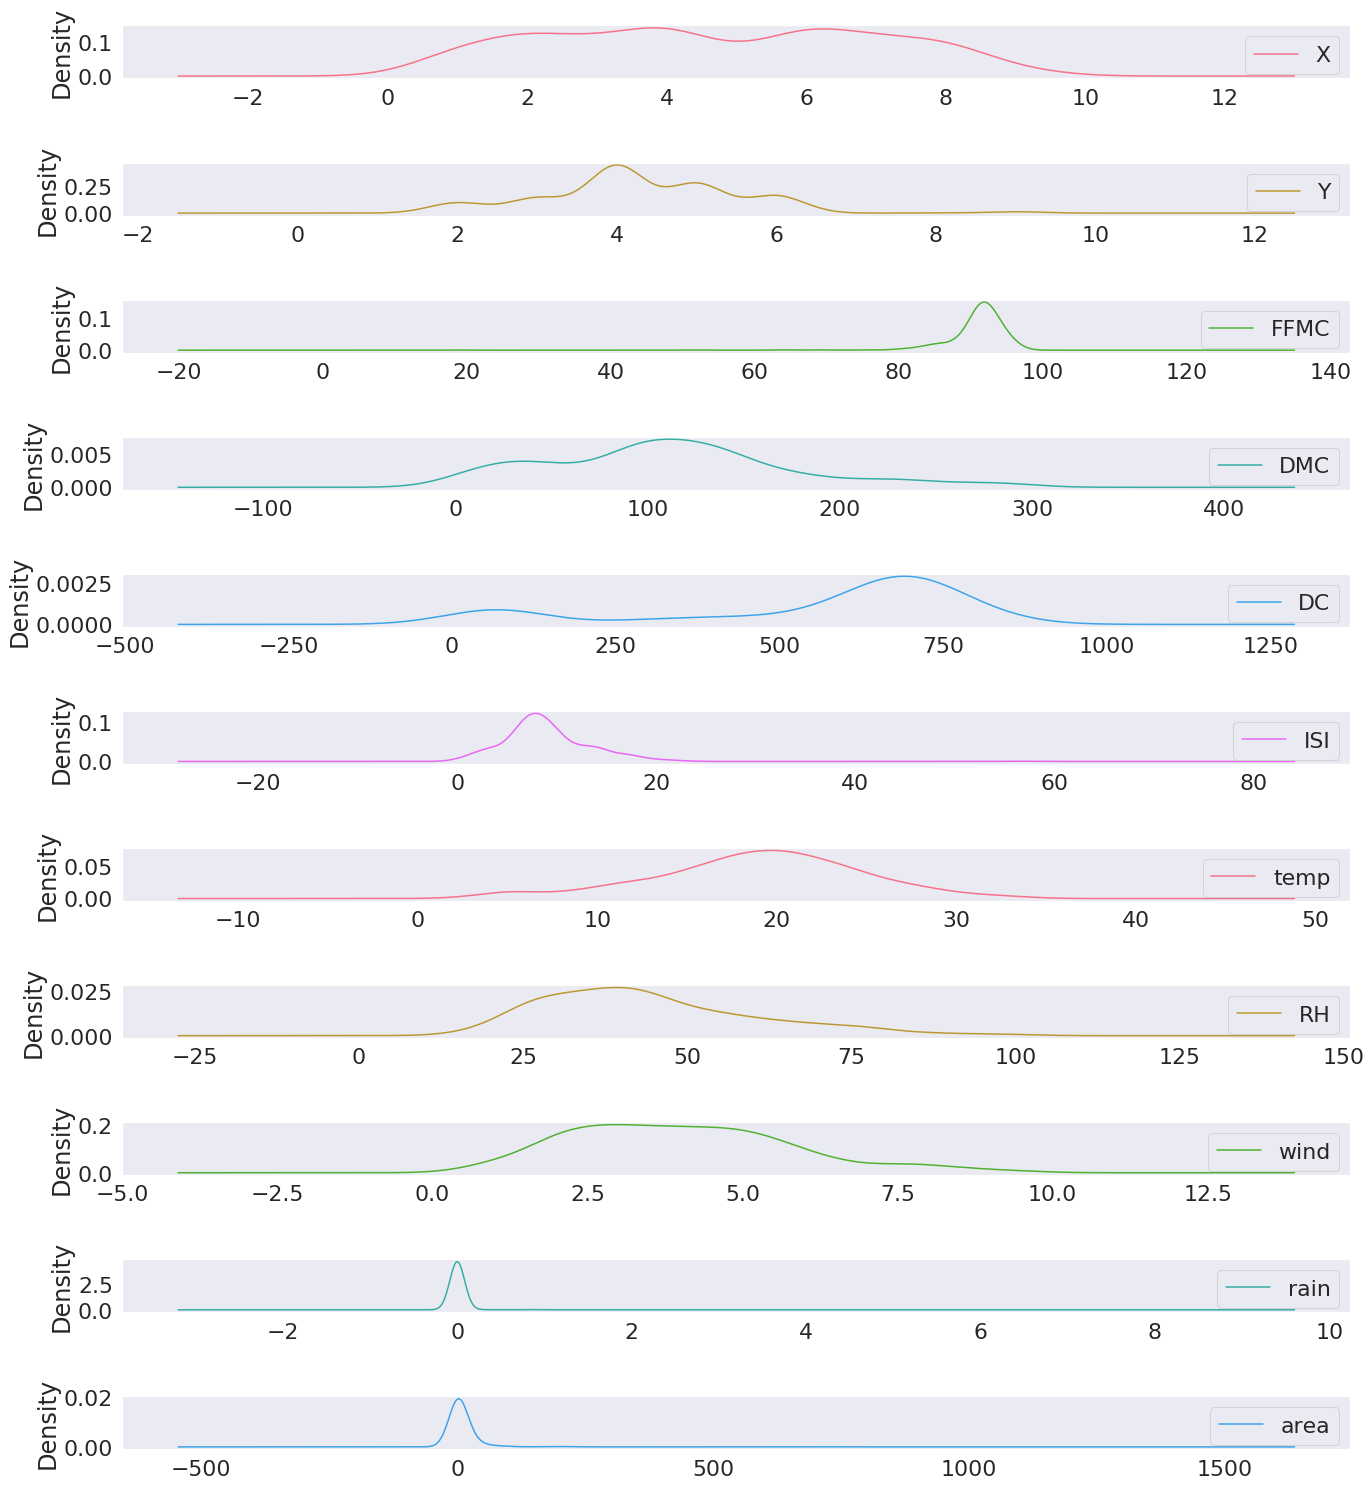

In [6]:
# Density visualisation
fire_dataframe.plot(kind='density', subplots=True, layout=(13,1), sharex=False, sharey=False, figsize=(20, 25))
plt.tight_layout(pad=2.0)

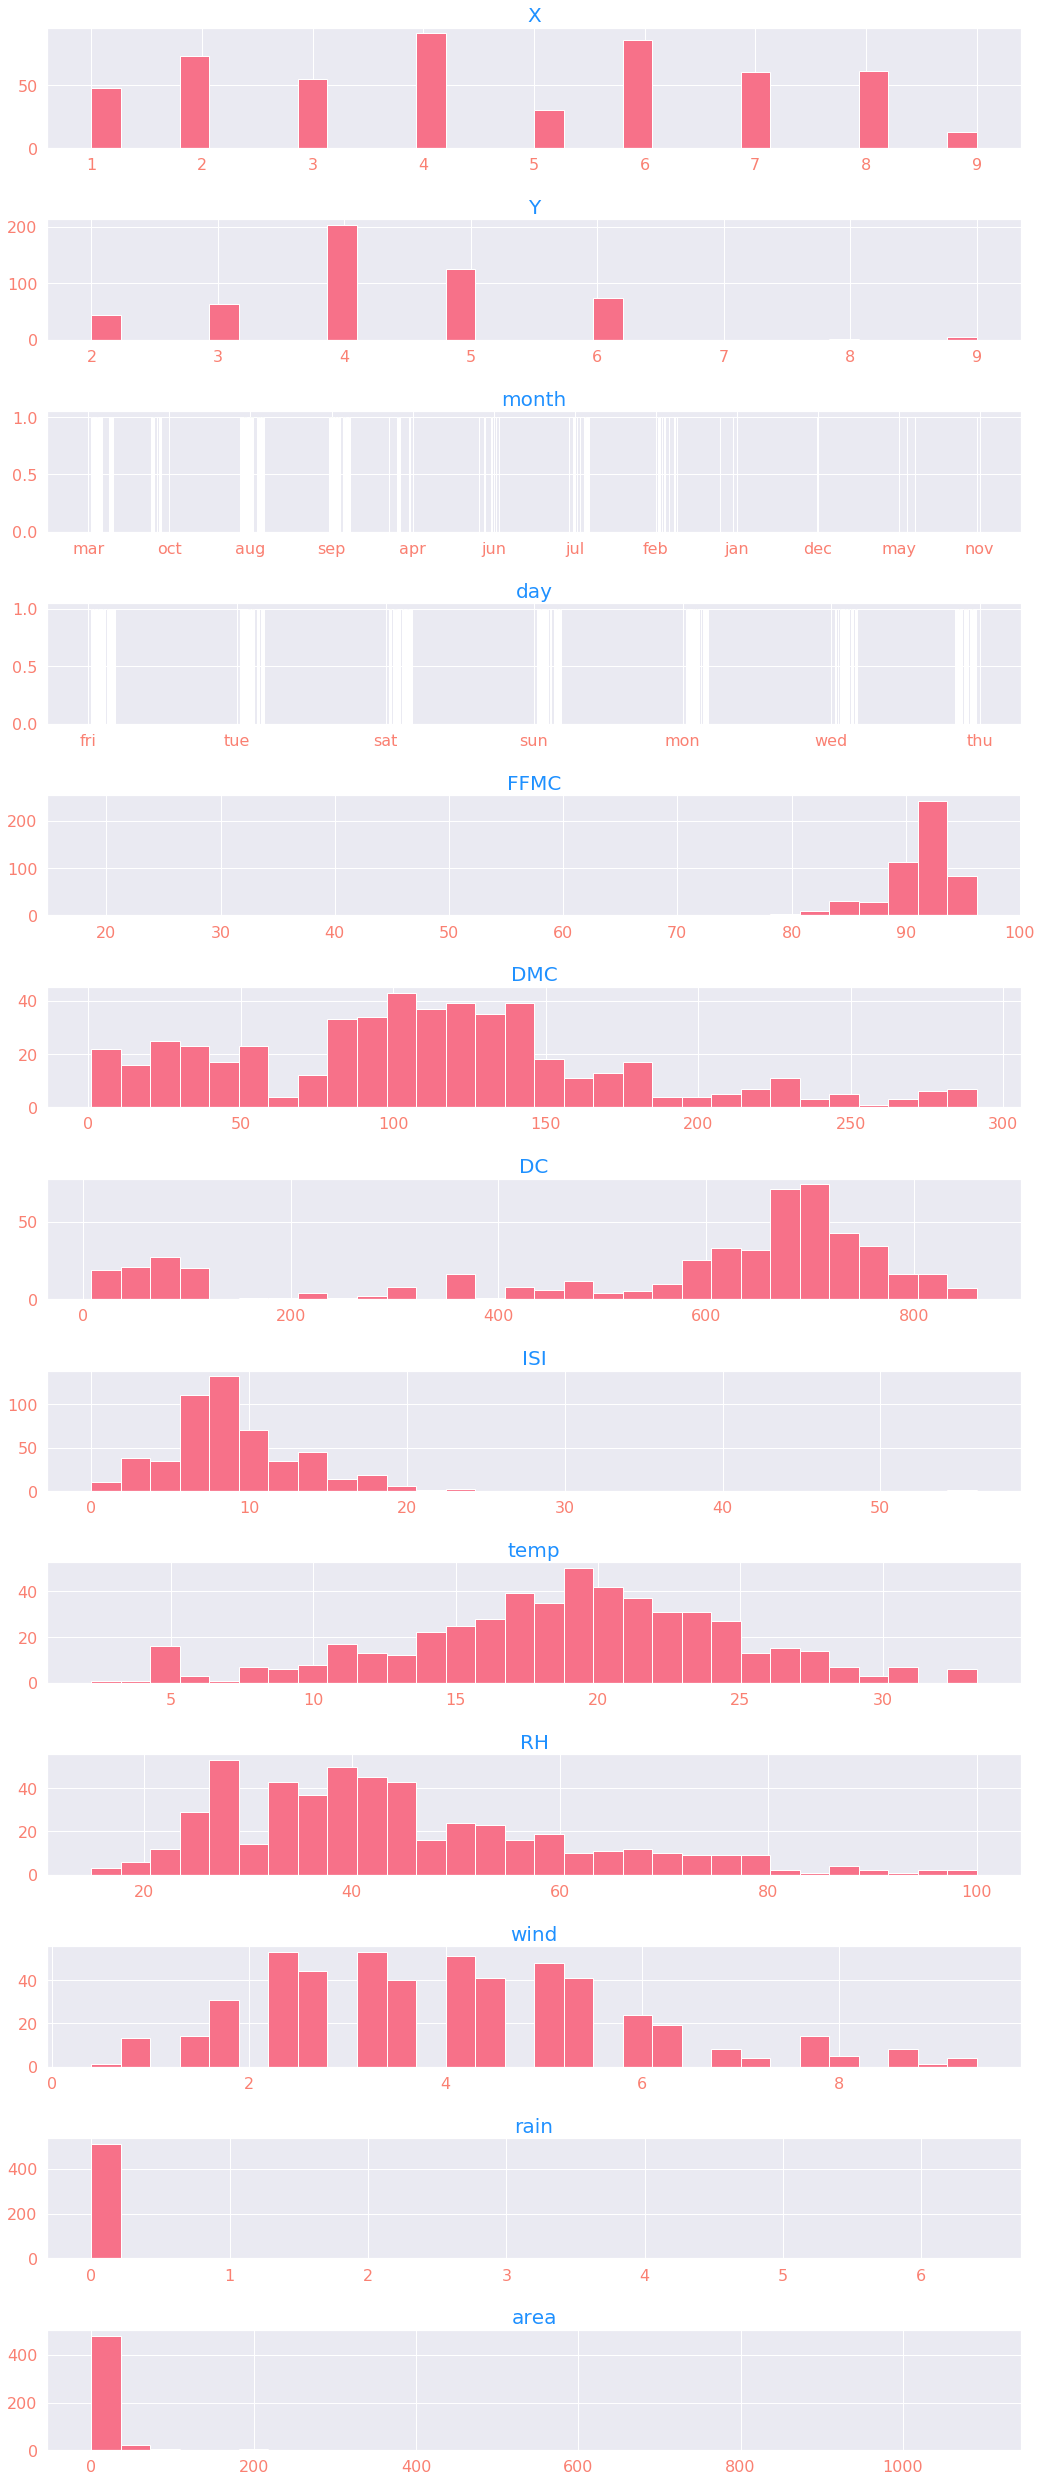

In [7]:
font_size = 20
label_colour = 'salmon'
label_size = 16
n_bins = 30
title_colour = 'dodgerblue'

figure, axes = plt.subplots(len(fire_dataframe.columns), figsize=(15,35))
for n, col in enumerate(fire_dataframe.columns):
    fire_dataframe[col].hist(ax=axes[n], bins=n_bins)
    axes[n].set_title(label=col, fontsize=font_size, color=title_colour)
    axes[n].tick_params(axis='both', labelsize=label_size, labelcolor=label_colour)
    
figure.tight_layout()

In [8]:
# One-hot encode the 'Months' and 'Days' column to get data in integer form
fire_data_dummied = pd.get_dummies(fire_dataframe)
fire_data_dummied.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,...,0.001934,0.029014,0.332689,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,...,0.043980,0.168007,0.471632,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
labels = np.array(fire_data_dummied[['area']])
fire_data_dummied = fire_data_dummied.drop(['area'], axis=1)
fire_column_names_list = list(fire_data_dummied.columns)
fire_data_numpyed = np.array(fire_data_dummied)

In [10]:
# Split the data into training and test sets, ensure proper data distribution & randomisation data between them
train_fire_data, test_fire_data, train_labels, test_labels = train_test_split(fire_data_numpyed, labels, test_size=0.24, random_state=42)

In [11]:
# Expectation - training datasets have same number of columns between them as do testing datasets
print('Training Dataset Shape:', train_fire_data.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Dataset Shape:', test_fire_data.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Dataset Shape: (392, 29)
Training Labels Shape: (392, 1)
Testing Dataset Shape: (125, 29)
Testing Labels Shape: (125, 1)


In [12]:
random_forest = RandomForestRegressor(max_depth=3, n_estimators=5000, random_state=42, bootstrap=True, max_features='sqrt', n_jobs=-1, verbose=1)

# Call ravel on train_labels to avoid Data Conversion Warning error
random_forest.fit(train_fire_data, train_labels.ravel())

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:    2.7s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=-1,
           oob_score=False, random_state=42, verbose=1, warm_start=False)

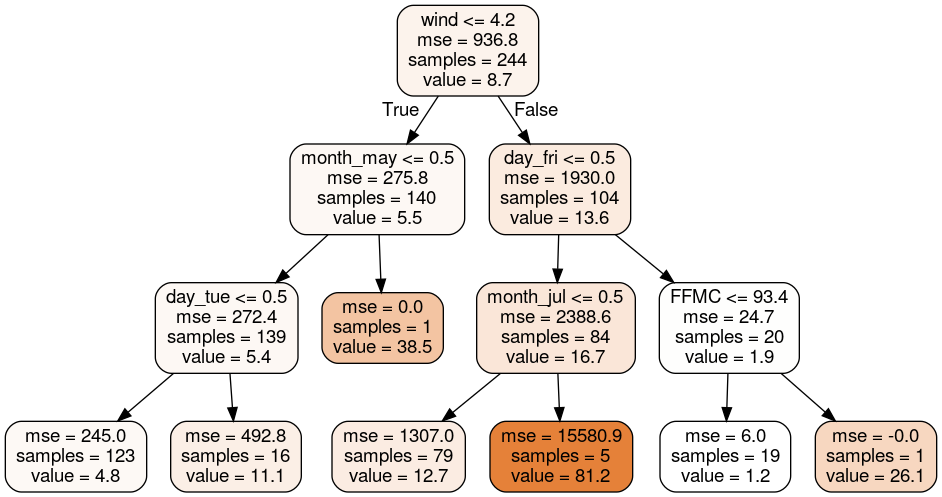

In [13]:
tree = random_forest.estimators_[5]
export_graphviz(tree, out_file='tree.dot', feature_names=fire_column_names_list, filled=True, rounded=True, precision=1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')
Image('tree.png')

In [14]:
# Make predictions on the test data so we can evaluate it
predictions = random_forest.predict(test_fire_data)
errors = abs(predictions - test_labels)
print('Mean absolute error:', round(np.mean(errors), 2), 'degrees.')

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 2418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 3168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 4018 tasks      | elapsed:    0.4s


Mean absolute error: 21.73 degrees.


[Parallel(n_jobs=16)]: Done 4968 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 5000 out of 5000 | elapsed:    0.4s finished


In [15]:
print('Forest fires model accuracy:', tree.score(test_fire_data, test_labels))
# The error margin and accuracy aren't good. We need to refine the data we're training our model on

Forest fires model accuracy: -0.013071340185044855


In [22]:
# Test with columns dropped and suggested hyptertuned parameters:
train_fire_data, test_fire_data, train_labels, test_labels = train_test_split(fire_data_dummied, labels, test_size=0.24, random_state=42)
random_forest = RandomForestRegressor(max_depth=17, n_estimators=149, random_state=42, bootstrap=False, max_features=0.5, min_samples_split=10, max_leaf_nodes=18, n_jobs=-1, verbose=1)
random_forest.fit(train_fire_data, train_labels.ravel())

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 149 out of 149 | elapsed:    0.0s finished


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=17,
           max_features=0.5, max_leaf_nodes=18, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=149, n_jobs=-1, oob_score=False, random_state=42,
           verbose=1, warm_start=False)

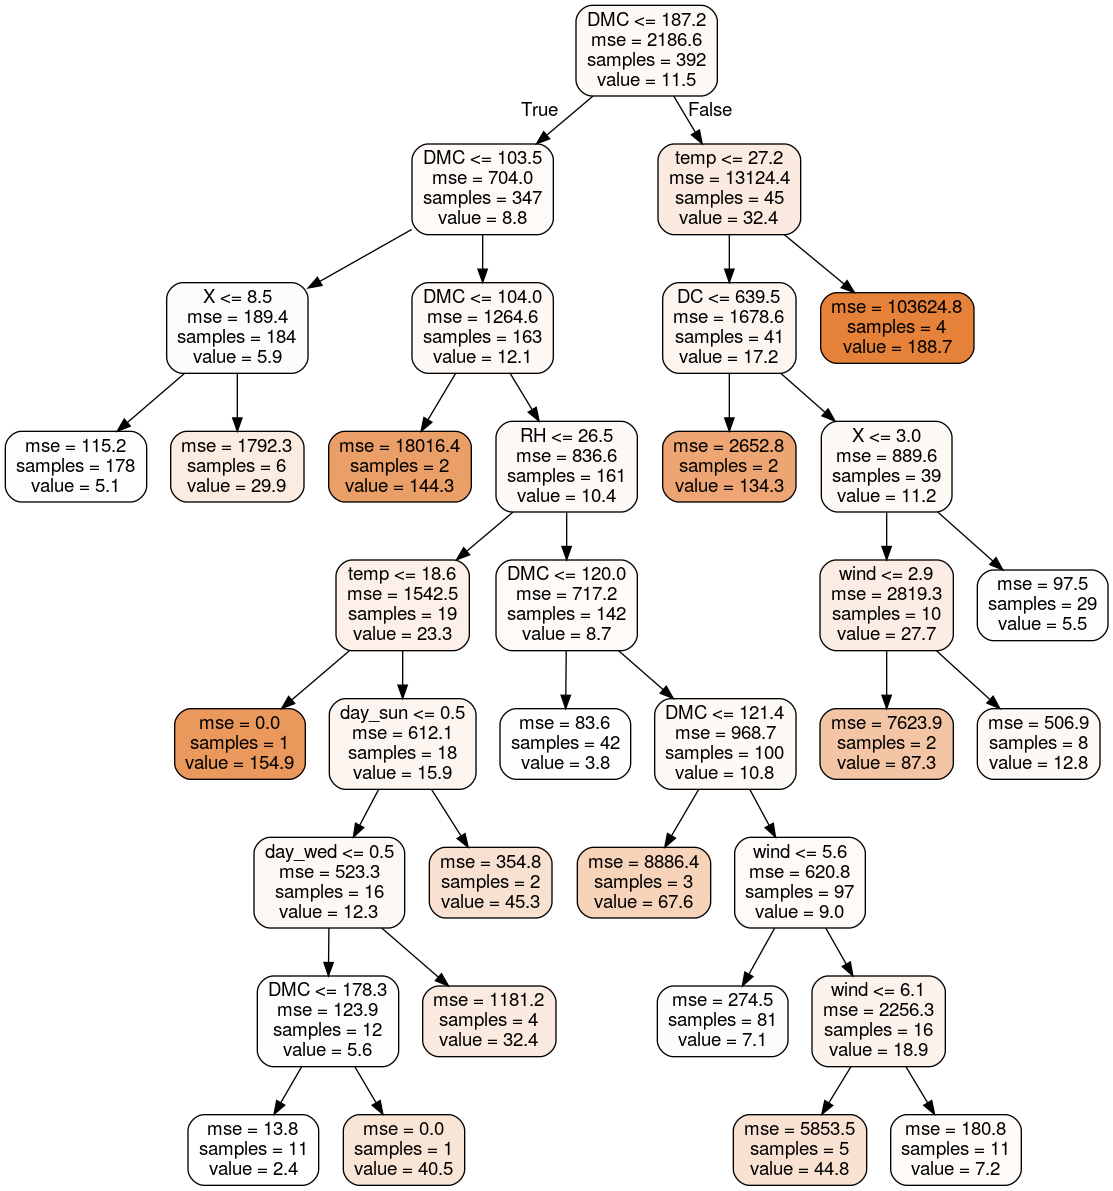

In [23]:
# Test 4
tree = random_forest.estimators_[5]
export_graphviz(tree, out_file='tree.dot', feature_names=fire_column_names_list, filled=True, rounded=True, precision=1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')
Image('tree.png')

In [24]:
# Test 4: Retest our predictions
predictions = random_forest.predict(test_fire_data)
errors = abs(predictions - test_labels)

print('Mean absolute error:', round(np.mean(errors), 2), 'degrees.')

Mean absolute error: 23.27 degrees.


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 149 out of 149 | elapsed:    0.0s finished


In [25]:
# Test 4: Accuracy
print('Forest fires model accuracy:', tree.score(test_fire_data, test_labels))

Forest fires model accuracy: 0.028358536122202852
